We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.api
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA

data = pd.read_csv(r'C:\Users\ouykh\Ironhack\DAFT_NOV_21_01\module_2\Lab_21_Time_Series_Models\airlines_passengers.csv') 

Let’s display the first five rows of data

In [2]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [3]:
data.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [4]:
data['Month'] = pd.to_datetime(data['Month']) 

The next thing we can do is convert the month column to an index. 


In [5]:
data=data.set_index('Month')

Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

Text(0, 0.5, 'Number of Passengers')

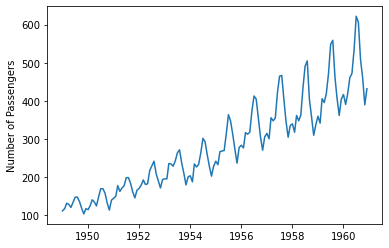

In [6]:
plt.plot(data)
plt.ylabel("Number of Passengers")

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [75]:
#imported on top

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [7]:
ad_fuller_result = adfuller(data,autolag='AIC')
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060423
p-value: 0.9918802434376409


Store our results in a dataframe display it

In [8]:
pd.DataFrame(ad_fuller_result)

,0
0,0.815369
1,0.99188
2,13
3,130
4,"{'1%': -3.4816817173418295, '5%': -2.884041834..."
5,996.692931


Explain the results

In [ ]:
# P value is high and greater than 0,05 so null hypothesis is rejected

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

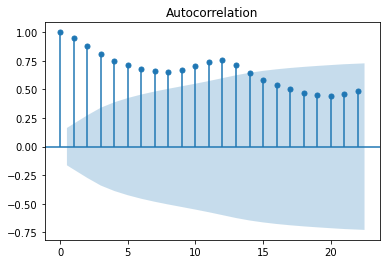

In [9]:
plot_acf(data['Passengers'])
plt.show()

Calculate partial autocorrelation

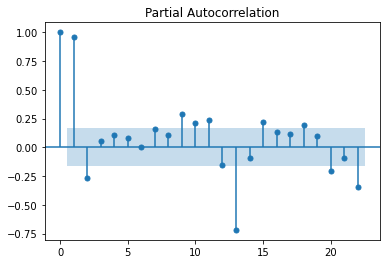

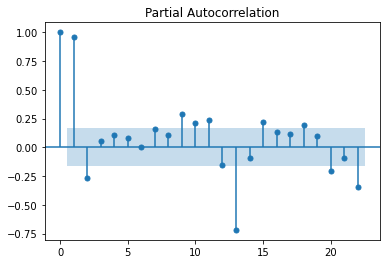

In [10]:
plot_pacf(data['Passengers'])

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


Text(0.5, 0.98, 'Multiplicative Decompose')

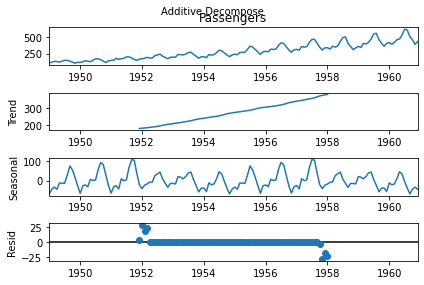

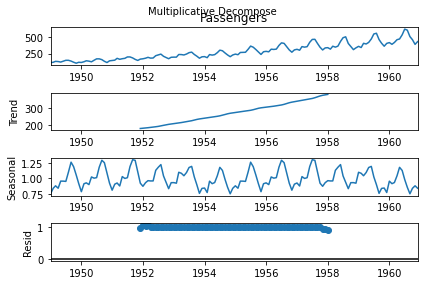

In [11]:
result_add = seasonal_decompose(data['Passengers'], model='additive', period=70)
result_add.plot().suptitle('Additive Decompose', fontsize=10)
result_mul = seasonal_decompose(data['Passengers'], model='multiplicative', period=70)
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=10)


Can you describe the charts?


In [82]:
# we can see a trend and there's a seasonality 

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [12]:
data['Difference'] = data['Passengers'].diff()
data = data.drop(data.index[0])
data['Diff_log'] = np.log(data['Passengers']) 
data.head()

,Passengers,Difference,Diff_log
Month,,,
1949-02-01,118,6.0,4.770685
1949-03-01,132,14.0,4.882802
1949-04-01,129,-3.0,4.859812
1949-05-01,121,-8.0,4.795791
1949-06-01,135,14.0,4.905275


In [13]:
result = adfuller(data.Difference)

print('ADF Test Statistic: %.2f' % result[0]) #critical value from statistics
print('5%% Critical Value: %.2f' % result[4]['5%']) # critical value from table
print('p-value: %.2f' % result[1])

ADF Test Statistic: -2.83
5% Critical Value: -2.88
p-value: 0.05


In [14]:
result = adfuller(data.Diff_log)

print('ADF Test Statistic: %.2f' % result[0]) #critical value from statistics
print('5%% Critical Value: %.2f' % result[4]['5%']) # critical value from table
print('p-value: %.2f' % result[1])

ADF Test Statistic: -1.73
5% Critical Value: -2.88
p-value: 0.42


MA(1)

In [16]:
# Split the dataset
X = data.Passengers
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]  # split the data in 2 subsets to check that our means and variances are not the same
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=184.708333, mean2=379.605634
variance1=2250.772887, variance2=7311.727968


In [18]:
#we need to split our data (the difference column) to try our model
X = data.Difference
split = 2*round(len(X) / 3)

train,  test =X[0:split], X[split:]  # split the data in 2 subsets to check that our means and variances are not the same

# train = 96
# test = 47

In [17]:
model = ARMA(train.dropna(), order=(0,1))  #We do the model with the train
result = model.fit()

NameError: name 'train' is not defined

In [13]:
#Code for Durbin Watson test
import numpy as np
import statsmodels.api as sm

X =np.arange(len(data))
Y = np.asarray(data)
X = sm.add_constant(X)

from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

# Fit the ordinary least square method.
ols_res = OLS(Y,X).fit()

# apply durbin watson statistic on the ols residual
print(durbin_watson(ols_res.resid))


0.5371938961768885


Display the output

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Difference   No. Observations:                   94
Model:                     ARMA(0, 1)   Log Likelihood                -424.862
Method:                       css-mle   S.D. of innovations             22.198
Date:                Wed, 19 Jan 2022   AIC                            855.723
Time:                        17:52:27   BIC                            863.353
Sample:                    03-01-1949   HQIC                           858.805
                         - 12-01-1956                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.2248      3.177      0.700      0.484      -4.002       8.451
ma.L1.Difference     0.3913      0.121      3.247      0.001       0.155       0.627
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.5556           +0.0000j            2.5556            0.5000
-----------------------------------------------------------------------------
"""

In [21]:
model.predict(test)

array([ 9.        ,  8.64467005,  9.83174061, 10.27369559,  8.7338354 ,
        8.69527396,  9.621091  , 10.54436364, 10.96745455, 10.85481818,
        8.77534416,  9.84109601,  8.91722114,  8.5655158 , 10.04039399,
       10.43145671,  8.03081834,  8.07362988,  9.57668785, 10.54119199,
       11.53865657, 11.18133261,  7.94152376,  9.21010884,  9.30072206,
        7.66433729, 10.61888123,  9.11563437,  9.22254531,  8.15875324,
        9.58276809, 10.75591201, 11.339708  , 10.95283629,  8.35377402,
        9.23955529,  9.01711109,  8.71550794, 10.47967914,  9.60569137,
        7.18612081,  8.65615149,  8.76115368, 11.98293955, 11.14163854,
       11.15297418,  8.22521244,  9.44465803,  9.67461843,  6.83390132,
        9.55956438, 10.11139746,  8.72224268,  8.12301733,  9.00878695,
       12.14348478, 11.72453463, 12.05175247,  8.36083946,  9.3829171 ,
       10.81306551,  6.41521896, 10.0296585 ,  9.21640418,  7.51545744,
        6.82253267, 10.13018091, 12.15215578, 12.01086827, 11.71

MA(2)

In [26]:
model = ARMA(train, order=(2, 0))
result = model.fit

C:\Users\ouykh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Display the output

In [27]:
result.summary()

AttributeError: 'function' object has no attribute 'summary'

AR(2)

In [ ]:
model = ARMA(train, order=(2, 0))
result = model.fit

ARMA (?,?)

Display the output

ARIMA(?,?)

Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

Calculate AIC